In [12]:
# General imports 
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16,7)             # Large image
mpl.rcParams["image.interpolation"] = "nearest"     # No blurring

# Webbpsf
import webbpsf
from webbpsf.roman import WFI

In [13]:
test_radius = 40

circ_func = lambda x, y, radius: (x-91)**2 + (y-91)**2 <= radius**2

x, y = np.arange(0,182), np.arange(0,182)
xgrid, ygrid = np.meshgrid(x, y)

circ = circ_func(xgrid, ygrid, test_radius)

data.sum() - data[np.where(circ)].sum()

0.01344648041482921

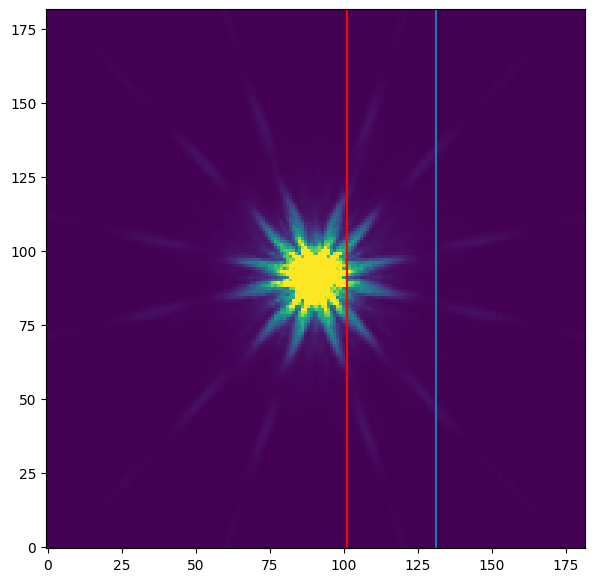

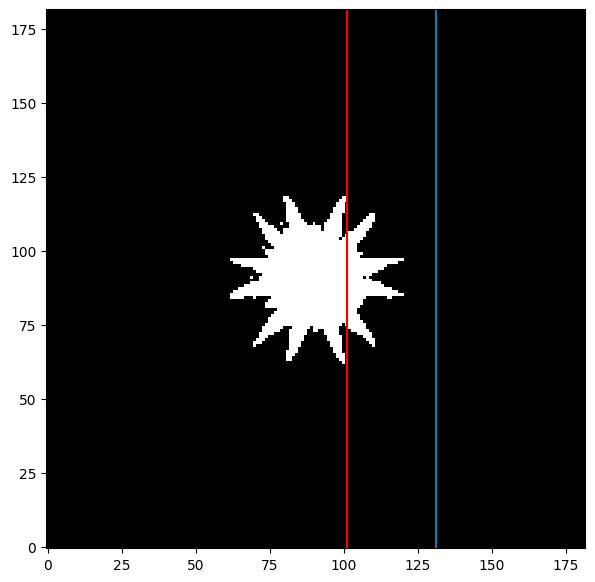

In [17]:
file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/psf_center_2044_2044_oversamp2_SCA1.fits")
data = file[1].data
file.close()

plt.imshow(data, vmin=0, vmax=data.max()/1000, origin='lower')
plt.axvline(91+40)
plt.axvline(91+10, c='r')
plt.show()

condition = (data >= data.max()/10000)
seg = np.where(condition, 1, 0)

plt.imshow(seg, vmin=0, vmax=1, origin='lower', cmap='Greys_r')
plt.axvline(91+40)
plt.axvline(91+10, c='r')

In [15]:
fits.writeto("../fits/psf_seg.fits", data=seg, overwrite=True)